In [1]:
from loading import *

Loaded Cache Files
Time taken to load cache files: 17.47


In [2]:
loc = 2

In [3]:
M = data_points[loc]
Rvir = rvir[loc] / 1000
Rs = rs[loc] / 1000
cvir = Rvir/Rs

X, Y, Z = x[loc], y[loc], z[loc]
arr_points_2 = get_points(X, Y, Z, arr_points)

R = compute_R2(arrays(arr_points_2, X, Y, Z, 1))
pairs, _ = np.histogram(R, bins=RADIUS_BINS)
total_mass = np.array(pairs) * MASS * (100 / PERCENT)

volume = Volume(1)

obs = total_mass / volume

In [4]:
cvir, Rs

(4.802778366268775, 0.16147799682617187)

In [7]:
mask = np.where(RADIUS < rvir[loc] / 1000)
obs = obs[mask]

In [8]:
np.log10(M), obs

(13.721233376312444,
 array([2.04728023e+16, 1.20972434e+16, 8.51562390e+15, 6.29225145e+15,
        4.02481952e+15, 2.52850781e+15, 1.58564558e+15, 9.05537518e+14,
        5.45034224e+14, 3.47679278e+14, 2.08335399e+14, 1.09940358e+14,
        5.75625583e+13, 3.11987535e+13, 1.54745066e+13, 8.16130283e+12]))

In [9]:
c_inv = cinv(obs)

In [18]:
def cost(lncvir, obs, cinv, M, Rvir, index=0):  # theta is Rs, M, Rvir
    if np.exp(lncvir) < 0:
        chis = np.inf
    else:
        Rs = Rvir / np.exp(lncvir)
        # print(Rs)
        R, model = rho_r(Rs, M, Rvir)
        # plt.plot(R, model)
        # plt.plot(R, obs)
        # plt.xscale('log')
        # plt.yscale('log')
        # plt.show()
        chis = chisq(obs, model, cinv)
    # print(index)
    if index == 0:
        return chis
    elif index == 1:
        # print('log chisq', np.log(1 + chis), 'cvir', np.exp(lncvir))
        return np.log(1 + chis ** 2)

In [16]:
cvirs = np.linspace(np.log(1), np.log(30), 1000)
# cvirs = [np.log(cvir)]

In [35]:
b = np.array([])
for c in cvirs:
    # print(c, np.exp(c))
    cos = cost(c, obs, c_inv, M, Rvir)
    b = np.append(b, cos)

In [36]:
optres = iminuit.minimize(cost, [np.log(10)], args=(obs, c_inv, M, Rvir, 0))
optres.x

array([1.75218465])

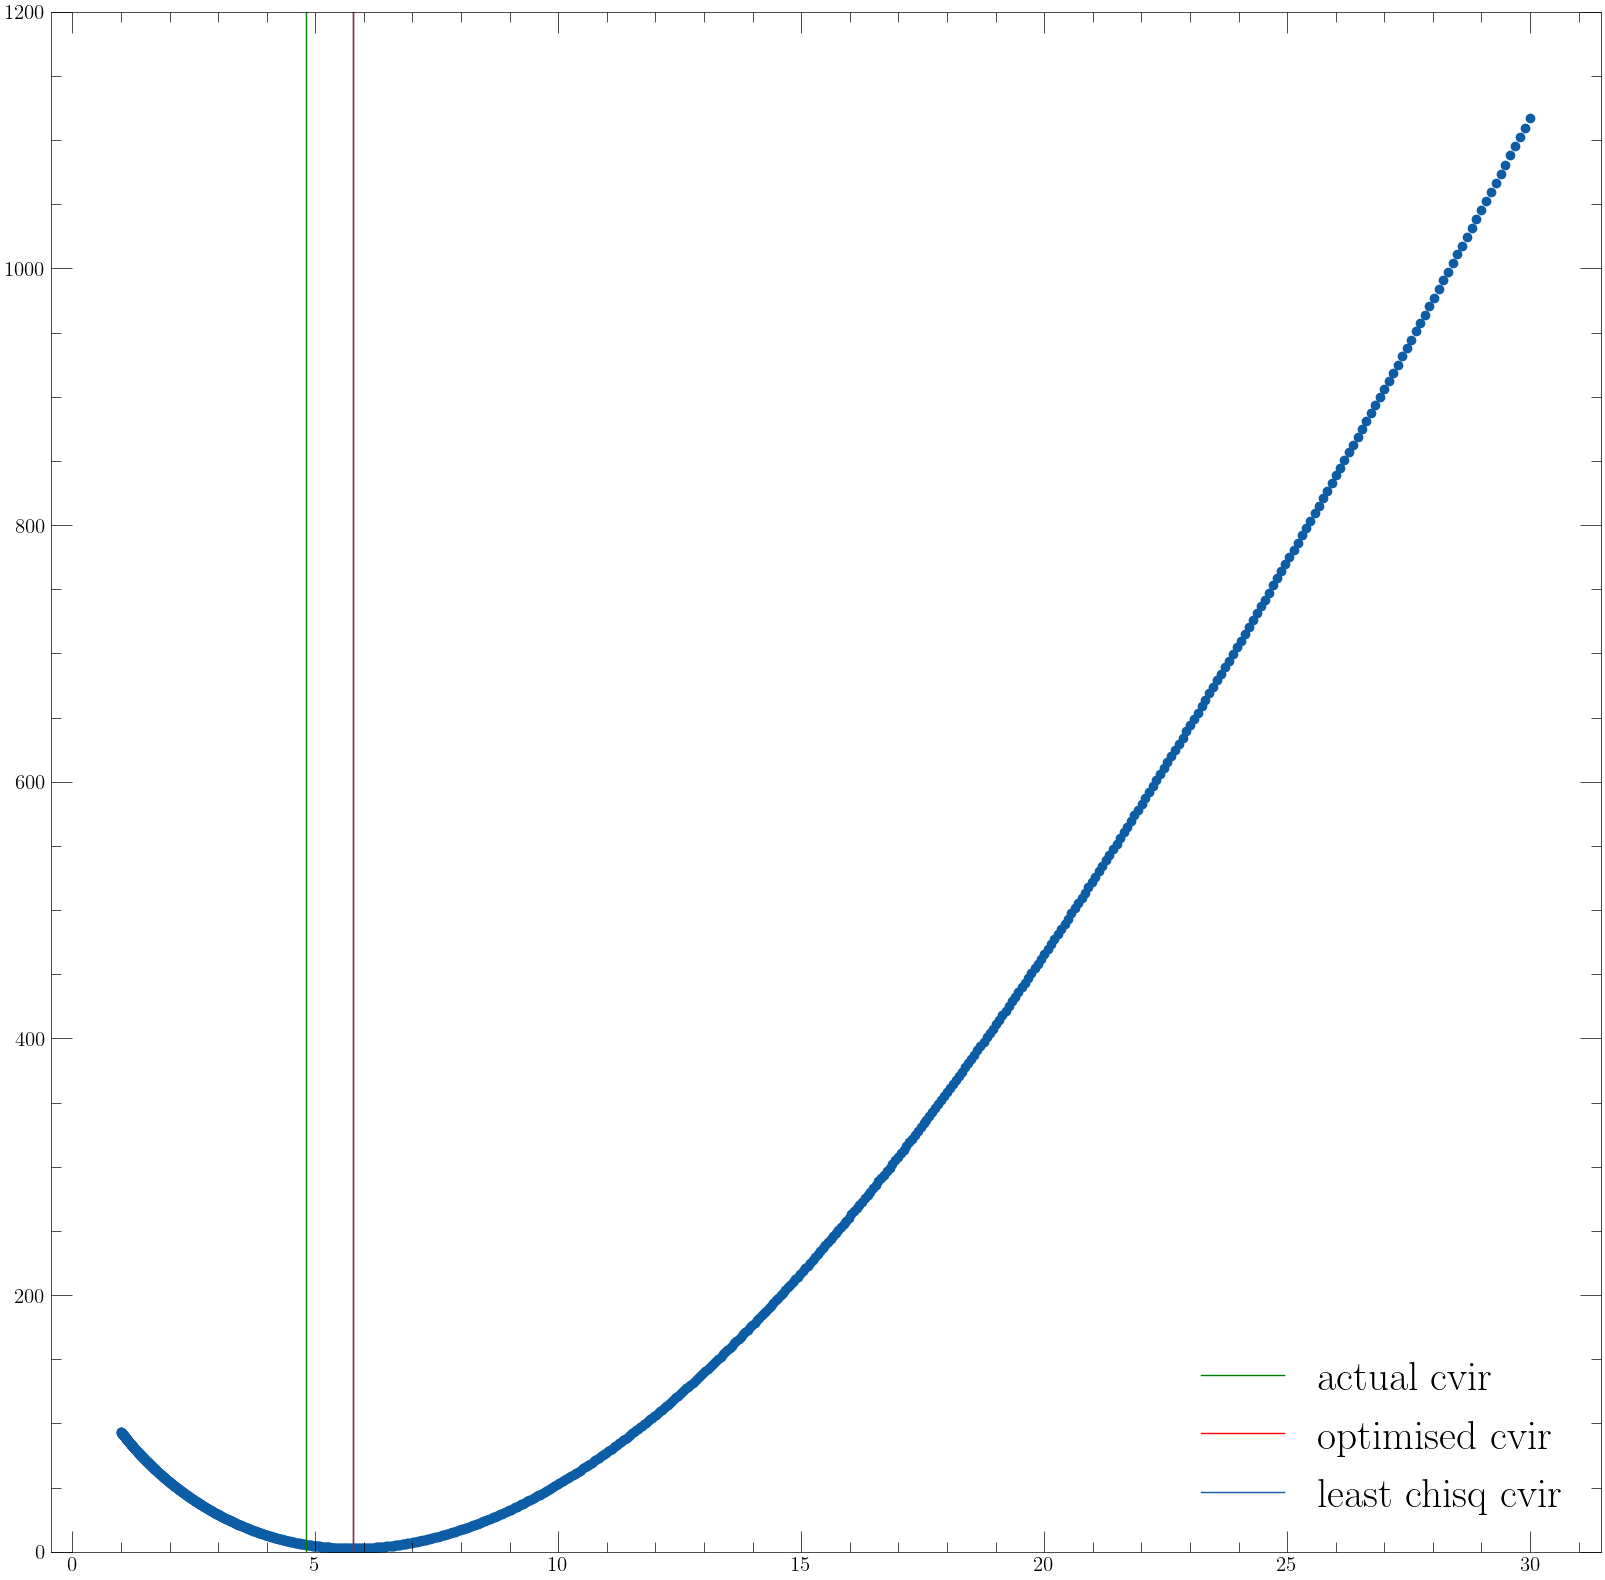

In [37]:
plt.scatter(np.exp(cvirs), b)
plt.axvline(cvir, c='g', label='actual cvir')
plt.axvline(np.exp(optres.x), c='r', label='optimised cvir')
plt.axvline(np.exp(cvirs)[np.argmin(b)], label='least chisq cvir')
plt.ylim(0, 1200)
plt.legend()


In [38]:
bl = np.array([])
for c in cvirs:
    # print(c, np.exp(c))
    cos = cost(c, obs, c_inv, M, Rvir, 1)
    bl = np.append(bl, cos)

optresl = iminuit.minimize(cost, [np.log(10)], args=(obs, c_inv, M, Rvir, 1))
np.exp(optresl.x)

array([5.76518432])

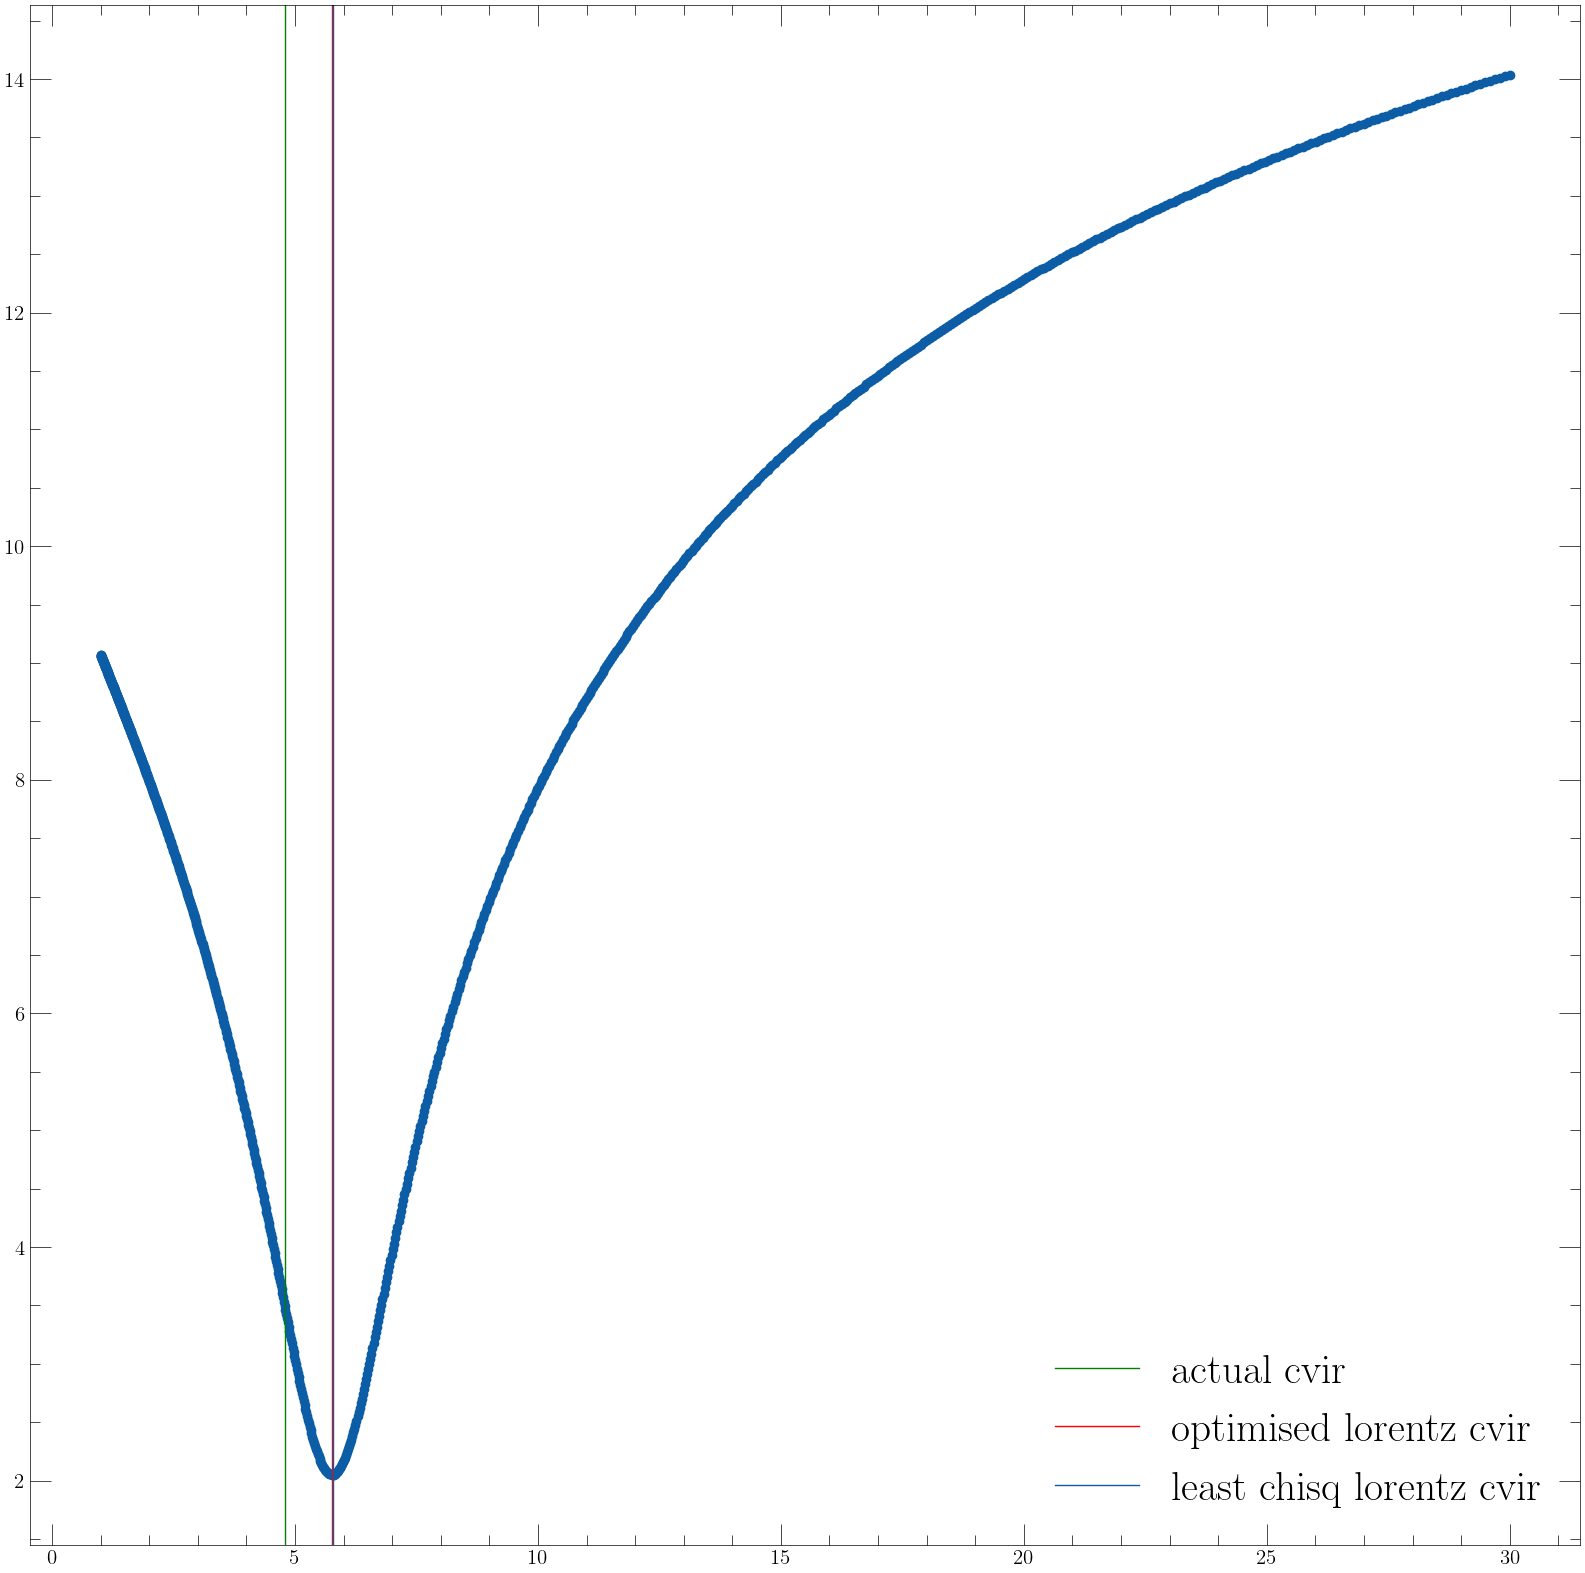

In [42]:
plt.scatter(np.exp(cvirs), bl)
# plt.scatter(np.exp(cvirs), b)
plt.axvline(cvir, c='g', label='actual cvir')
# plt.axvline(np.exp(optres.x), c='r', label='optimised cvir')
plt.axvline(np.exp(optresl.x), c='r', label='optimised lorentz cvir')
# plt.axvline(np.exp(cvirs)[np.argmin(b)], label='least chisq cvir')
plt.axvline(np.exp(cvirs)[np.argmin(bl)], label='least chisq lorentz cvir')
# plt.ylim(0, 1200)
plt.legend()